**Finlatics Project on Wine Dataset**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv('wine_data.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
df.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


1.	What is the most frequently occurring wine quality? What is the highest number in and the lowest number in the quantity column?

In [ ]:
# Distribution of the 'quality' column
quality_counts = df['quality'].value_counts()
print("\nWine Quality Distribution:")
print(quality_counts)


Wine Quality Distribution:
quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64


2.	How is `fixed acidity` correlated to the quality of the wine? How does the alcohol content affect the quality? How is the `free Sulphur dioxide` content correlated to the quality of the wine?

In [ ]:
# Calculating the correlation matrix
correlation_matrix = df.corr()

# Extracting correlations with the 'quality' column
quality_corr = correlation_matrix['quality']
print("\nCorrelation of features with wine quality:")
print(quality_corr)


Correlation of features with wine quality:
fixed acidity           0.124052
volatile acidity       -0.390558
citric acid             0.226373
residual sugar          0.013732
chlorides              -0.128907
free sulfur dioxide    -0.050656
total sulfur dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64


Fixed Acidity and Quality:
The correlation is 0.124, indicating a weak positive relationship; higher fixed acidity slightly improves wine quality.

Alcohol Content and Quality:
The correlation is 0.476, showing a moderate positive impact, where higher alcohol levels are associated with better wine quality.

Free Sulfur Dioxide and Quality:
The correlation is -0.051, reflecting a very weak negative association, meaning its effect on quality is negligible.

3.	What is the average `residual sugar` for the best quality wine and the lowest quality wine in the dataset?

In [ ]:
# Finding the highest and lowest wine quality ratings
highest_quality = df['quality'].max()
lowest_quality = df['quality'].min()

# Calculating the average residual sugar for the best and worst quality wines
best_quality_avg_sugar = df.loc[df['quality'] == highest_quality, 'residual sugar'].mean()
lowest_quality_avg_sugar = df.loc[df['quality'] == lowest_quality, 'residual sugar'].mean()

# Displaying the results
print(f"Average Residual Sugar for best quality wine : {best_quality_avg_sugar:.2f} g/L")
print(f"Average Residual Sugar for lowest quality wine: {lowest_quality_avg_sugar:.2f} g/L")


Average Residual Sugar for best quality wine : 2.58 g/L
Average Residual Sugar for lowest quality wine: 2.64 g/L


4.	Does `volatile acidity` has an effect over the quality of the wine samples in the dataset?

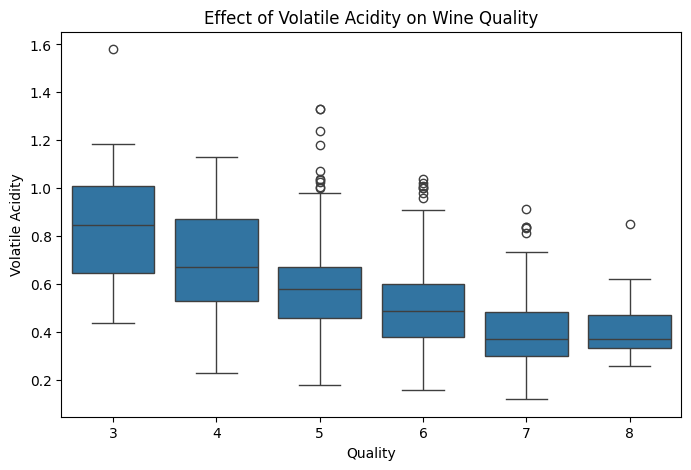

In [ ]:
# Scatter plot for volatile acidity vs quality
import seaborn as sns
plt.figure(figsize=(8, 5))
sns.boxplot(x='quality', y='volatile acidity', data=df)
plt.title('Effect of Volatile Acidity on Wine Quality')
plt.xlabel('Quality')
plt.ylabel('Volatile Acidity')
plt.show()


Indicates a negative correlation between volatile acidity and wine quality, where lower volatile acidity is associated with better quality.

5.	Train a Decision Tree model and Random Forest Model separately to predict the Quality of the given samples of wine. Compare the Accuracy scores for both models.



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Splitting the data into features (X) and target (y)
X = df.drop('quality', axis=1)
y = df['quality']

# Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree Model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, y_pred_dt)

# Random Forest Model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)

# Comparing the Accuracy Scores
print(f"\nDecision Tree Accuracy: {dt_accuracy * 100:.2f}%")
print(f"Random Forest Accuracy: {rf_accuracy * 100:.2f}%")




Decision Tree Accuracy: 55.94%
Random Forest Accuracy: 65.94%
